# 热传导方程

我们先统一的初始化一下环境

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import casadi as ca

# 中文显示设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号


## 一维热传导方程

一维热传导方程很好理解，传导速度与该位置的温差变化速度线性相关：

$$
\frac{\partial\mu(x, t)}{\partial t}=\alpha\frac{\partial^2\mu(x, t)}{\partial x^2}
$$

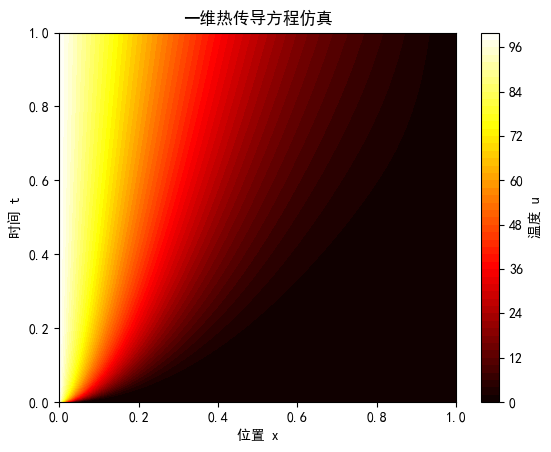

In [9]:

# 参数设置
L = 1.0  # 杆长
Nx = 50  # 空间网格点数
dx = L / (Nx - 1)  # 空间步长
alpha = 0.1  # 热扩散系数
dt = 0.001  # 时间步长
T = 1.0  # 总时间
Nt = int(T / dt)  # 时间步数

# 初始化温度分布
u = np.zeros(Nx)
u[0] = 100.0  # 左端温度固定为100
u[-1] = 0.0  # 右端温度固定为0

# CasADi 模型
x = ca.SX.sym("x")  # 空间变量
t = ca.SX.sym("t")  # 时间变量
u_sym = ca.SX.sym("u", Nx)  # 温度分布向量

# 离散化后的温度更新函数
u_new = ca.SX.sym("u_new", Nx)
for i in range(1, Nx - 1):
    u_new[i] = u_sym[i] + alpha * dt / dx**2 * (u_sym[i+1] - 2*u_sym[i] + u_sym[i-1])

# 固定边界条件
u_new[0] = 100.0
u_new[-1] = 0.0

# 构造 CasADi 函数
update_fn = ca.Function('update', [u_sym], [u_new])

# 时间迭代
u_history = [u.copy()]  # 保存温度历史
for n in range(Nt):
    u = update_fn(u).full().flatten()
    u_history.append(u.copy())

# 可视化结果（热力图）
x_grid = np.linspace(0, L, Nx)
t_grid = np.linspace(0, T, Nt + 1)
X, T = np.meshgrid(x_grid, t_grid)
U = np.array(u_history)

plt.figure()
plt.contourf(X, T, U, levels=50, cmap='hot')
plt.colorbar(label='温度 u')
plt.xlabel("位置 x")
plt.ylabel("时间 t")
plt.title("一维热传导方程仿真")
plt.show()

这里我调整了各种参数，以凸显热场的变化。这些参数的选择并没有特别的物理学含义。

## 二维热传导方程

从一维到二维热传导方程的扩展很容易：

$$
\frac{\partial\mu(x, y, t)}{\partial t}=\alpha(\frac{\partial^2\mu(x, y, t)}{\partial x^2} + \frac{\partial^2\mu(x, y, t)}{\partial y^2})
$$

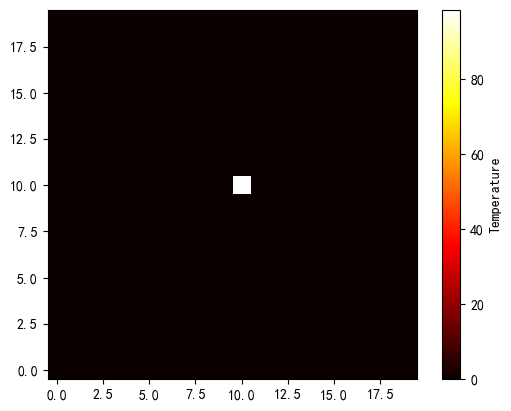

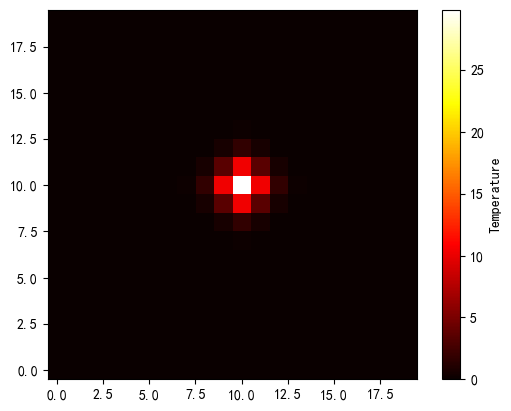

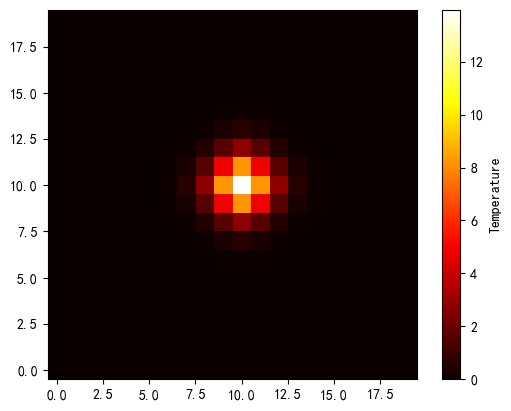

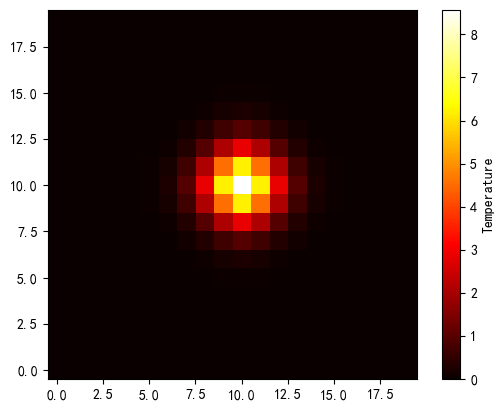

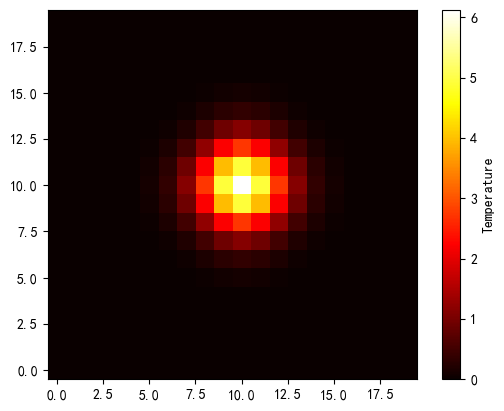

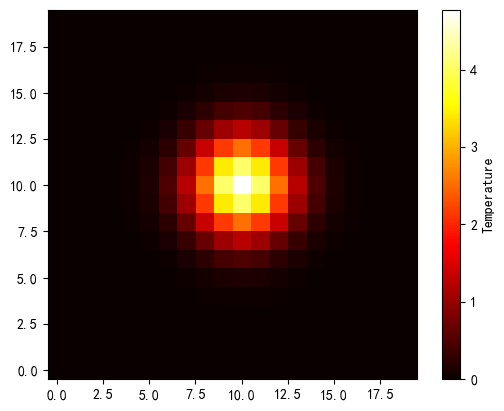

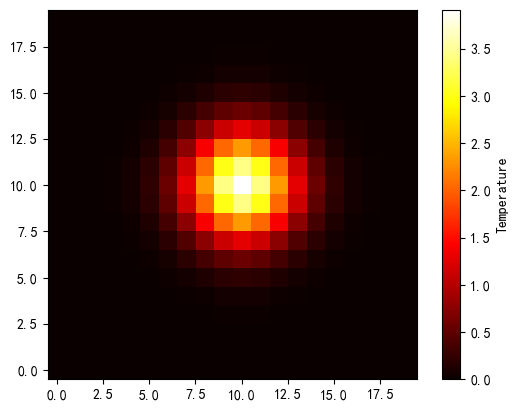

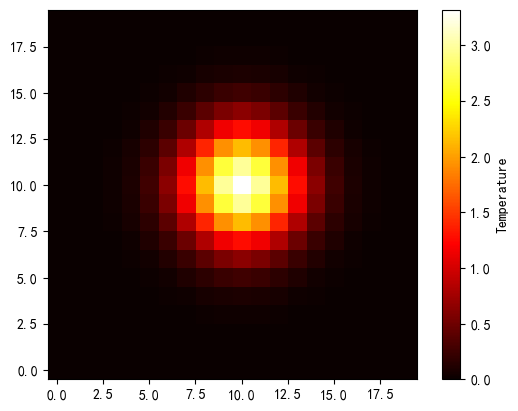

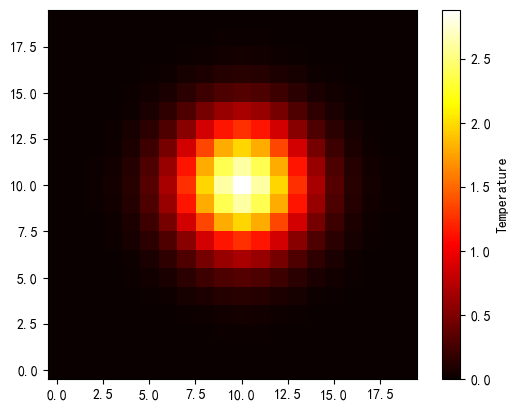

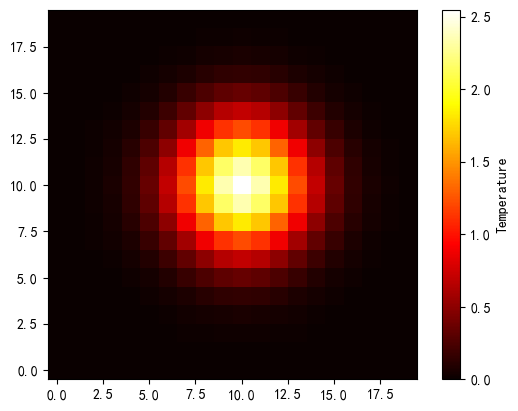

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from casadi import *

# 参数设置
Nx, Ny = 20, 20       # 空间网格数量
Lx, Ly = 1.0, 1.0     # 域大小
dx, dy = Lx / (Nx-1), Ly / (Ny-1)
alpha = 0.01
dt = 0.001
steps = 1000

# 初始条件: 中央为高温，其余为零
u0 = np.zeros((Nx, Ny))
cx, cy = Nx//2, Ny//2
u0[cx, cy] = 100.0

# CasADi 变量（展开为向量）
U = MX.sym('U', Nx*Ny)

def idx(i, j):
    return i * Ny + j

# 构建下一步的更新函数
U_next = []
for i in range(Nx):
    for j in range(Ny):
        k = idx(i, j)
        if i == 0 or i == Nx-1 or j == 0 or j == Ny-1:
            # 边界条件：恒为0
            U_next.append(U[k])
        else:
            # 中心差分更新
            u_ij = U[k]
            u_ip1j = U[idx(i+1, j)]
            u_im1j = U[idx(i-1, j)]
            u_ijp1 = U[idx(i, j+1)]
            u_ijm1 = U[idx(i, j-1)]

            d2x = (u_ip1j - 2*u_ij + u_im1j) / dx**2
            d2y = (u_ijp1 - 2*u_ij + u_ijm1) / dy**2

            u_new = u_ij + dt * alpha * (d2x + d2y)
            U_next.append(u_new)

U_next = vertcat(*U_next)
step_fun = Function('step_fun', [U], [U_next])

# 仿真循环
u = u0.flatten()
frames = []

for n in range(steps):
    u = step_fun(u).full().flatten()
    if n % 100 == 0:
        frames.append(u.reshape(Nx, Ny))

# 可视化
for frame in frames:
    plt.clf()
    plt.imshow(frame, cmap='hot', origin='lower')
    plt.colorbar(label='Temperature')
    plt.pause(0.1)

plt.show()


# 三维热传导方程

重复前面的过程，将二维扩展到三维，这个过程多少有点无聊。

$$
\frac{\partial\mu(x, y, z, t)}{\partial t}=\alpha(\frac{\partial^2\mu(x, y, z, t)}{\partial x^2} + \frac{\partial^2\mu(x, y, z, t)}{\partial y^2} + \frac{\partial^2\mu(x, y, z, t)}{\partial y^2})
$$

完成第 1/10 步演化
完成第 2/10 步演化
完成第 3/10 步演化
完成第 4/10 步演化
完成第 5/10 步演化
完成第 6/10 步演化
完成第 7/10 步演化
完成第 8/10 步演化
完成第 9/10 步演化
完成第 10/10 步演化


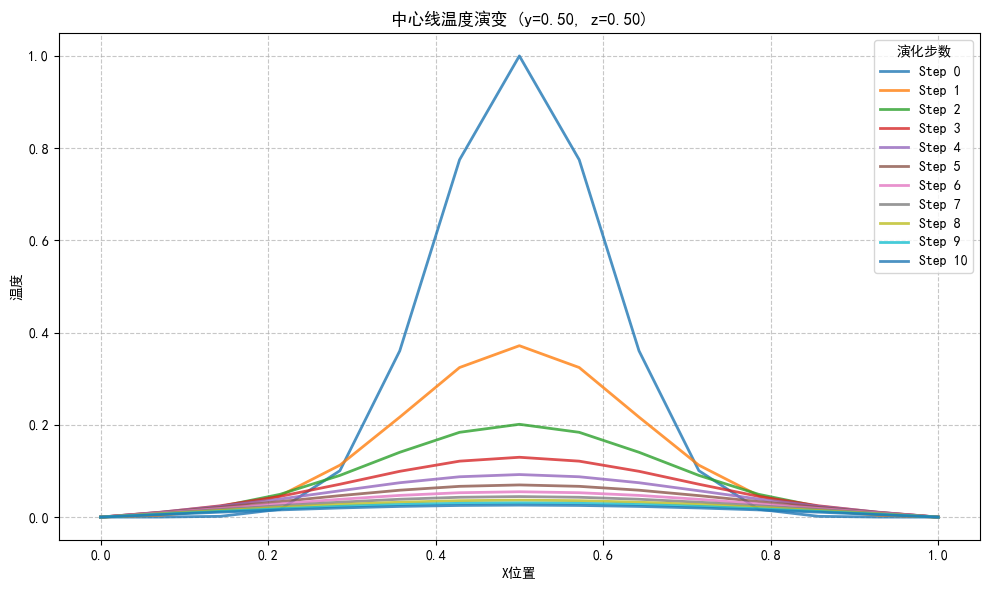

/var/folders/tm/s1d21dpj3_3bx9blf642czlh0000gn/T/ipykernel_28939/1292656984.py:189: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


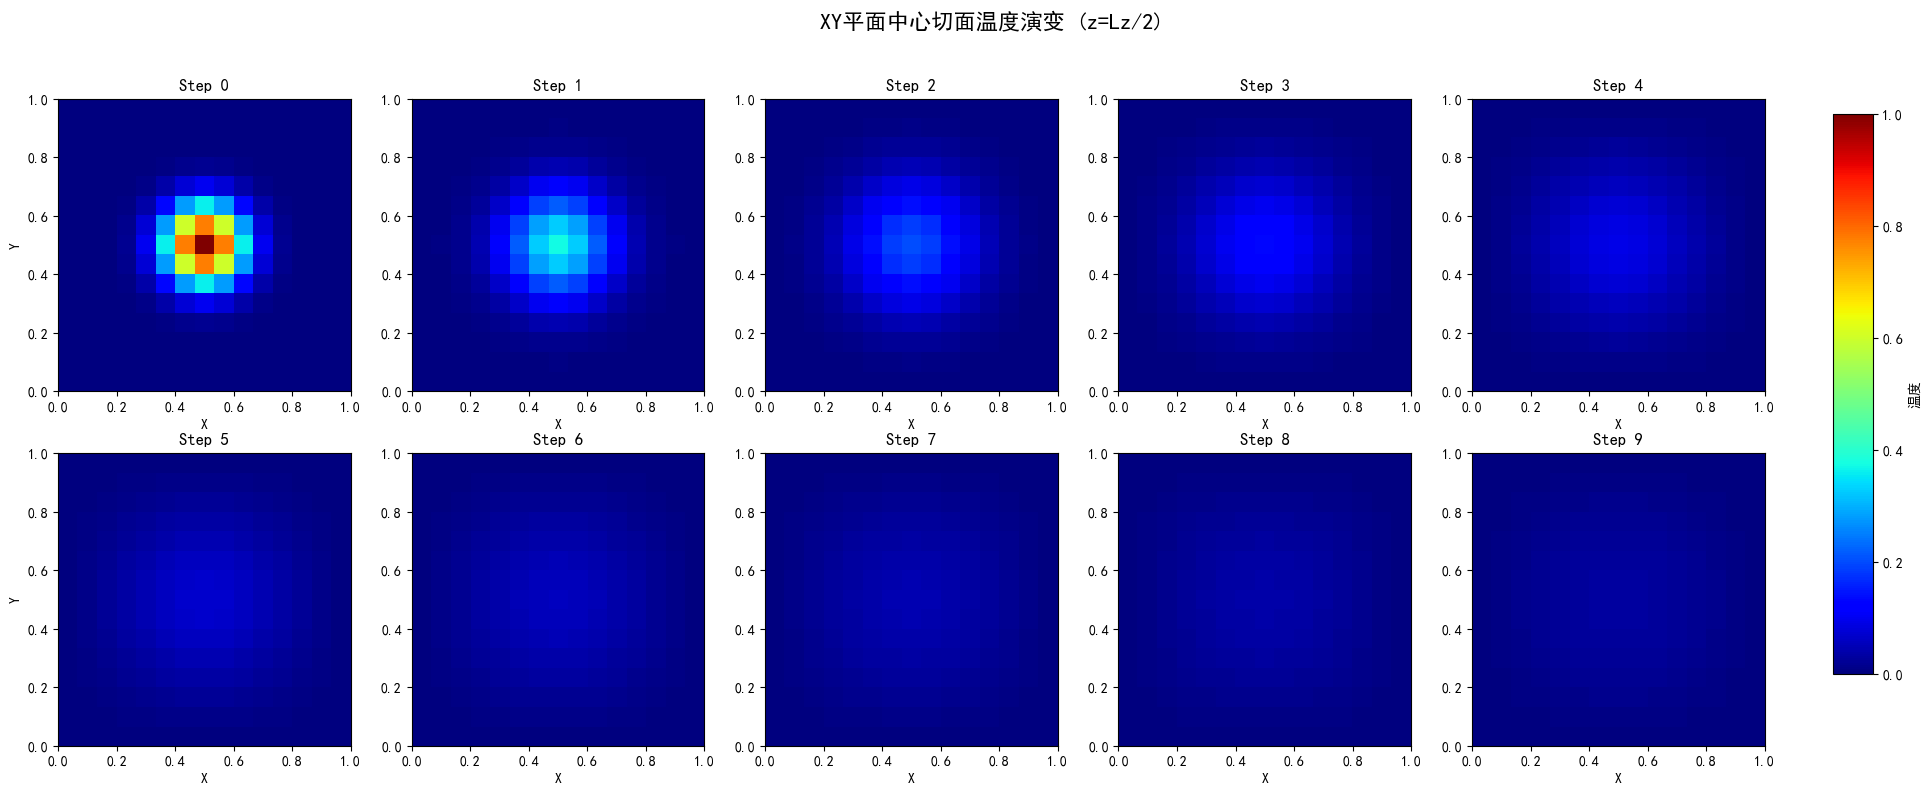

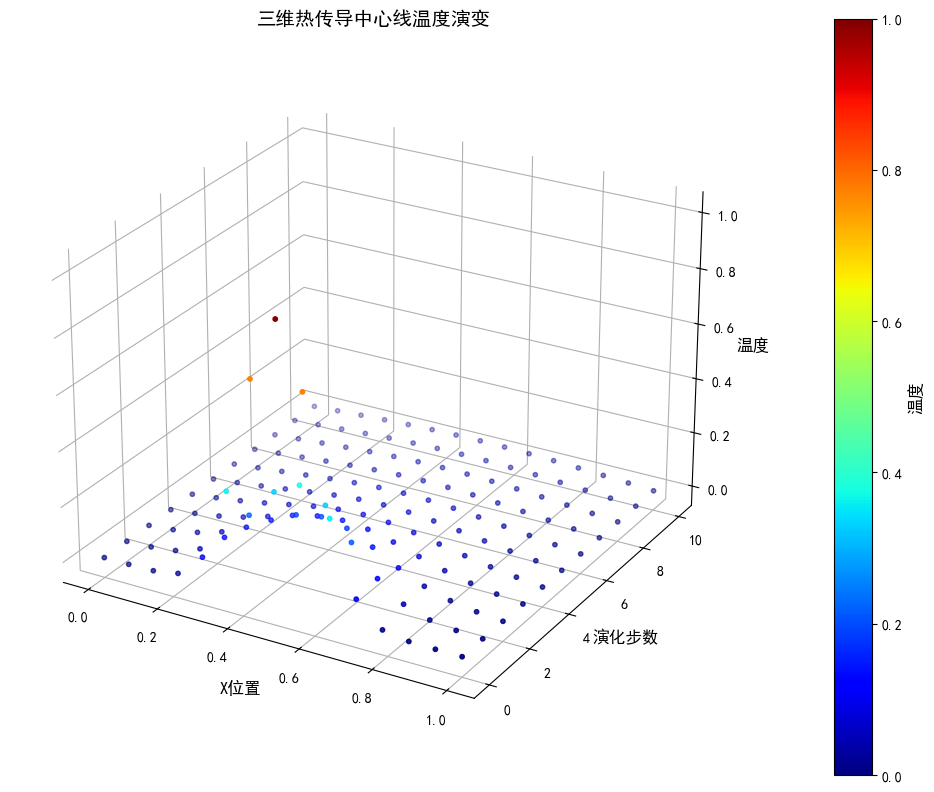

等温面动画已保存为 'isosurface_evolution.gif'


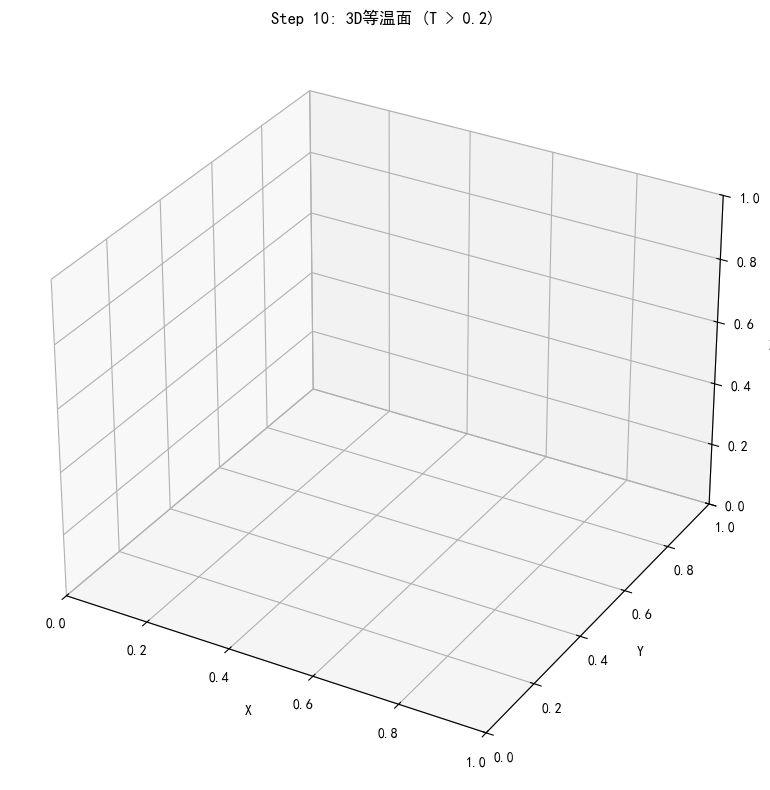

切片动画已保存为 'slice_evolution.gif'


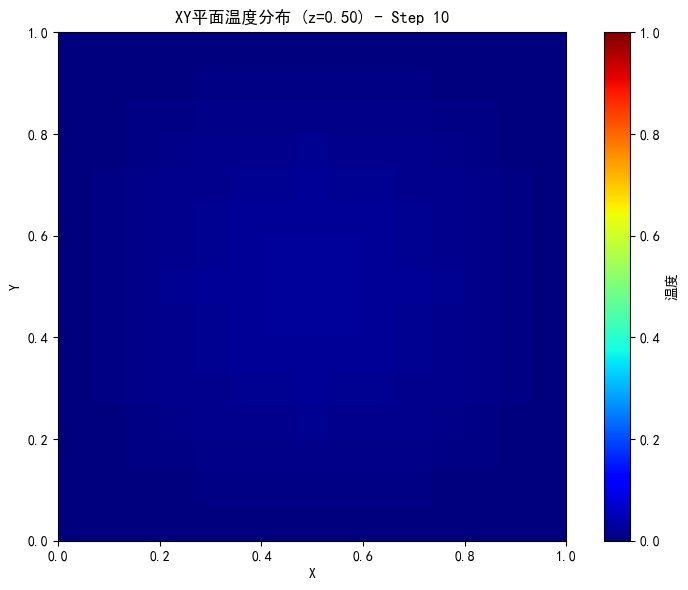

In [42]:
from concurrent.futures import ThreadPoolExecutor
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import cm

# 参数设置
Lx, Ly, Lz = 1.0, 1.0, 1.0  # 空间域尺寸
Nx, Ny, Nz = 15, 15, 15     # 空间网格点数
T_final = 0.5               # 仿真总时间
alpha = 0.1                 # 热扩散系数
num_steps = 10              # 演化步数

# 计算空间步长
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dz = Lz / (Nz - 1)

# 创建符号变量 - 温度状态向量 (内部点)
num_states = (Nx-2) * (Ny-2) * (Nz-2)
u = ca.MX.sym('u', num_states)

# 定义ODE右侧函数 (空间离散化)
def heat_eq_rhs(u_flat):
    # 将一维向量重塑为二维数组 (CasADi要求二维重塑)
    U_2d = u_flat.reshape((Nx-2, (Ny-2)*(Nz-2)))
    
    # 初始化导数数组
    dUdt_2d = ca.MX.zeros(U_2d.shape)
    
    # 获取内部点尺寸
    nx_in, ny_in, nz_in = Nx-2, Ny-2, Nz-2
    
    # 有限差分计算内部点
    for i in range(nx_in):
        for j in range(ny_in):
            for k in range(nz_in):
                # 当前点的索引
                idx = j*nz_in + k
                
                # 获取当前点温度值
                center = U_2d[i, idx]
                
                # 获取邻居点温度值
                # x方向邻居
                left = U_2d[i-1, idx] if i > 0 else 0
                right = U_2d[i+1, idx] if i < nx_in-1 else 0
                
                # y方向邻居
                jm1 = (j-1)*nz_in + k if j > 0 else 0
                jp1 = (j+1)*nz_in + k if j < ny_in-1 else 0
                front = U_2d[i, jm1] if j > 0 else 0
                back = U_2d[i, jp1] if j < ny_in-1 else 0
                
                # z方向邻居
                km1 = j*nz_in + (k-1) if k > 0 else 0
                kp1 = j*nz_in + (k+1) if k < nz_in-1 else 0
                bottom = U_2d[i, km1] if k > 0 else 0
                top = U_2d[i, kp1] if k < nz_in-1 else 0
                
                # 二阶中心差分
                d2udx2 = (left - 2*center + right) / dx**2
                d2udy2 = (front - 2*center + back) / dy**2
                d2udz2 = (bottom - 2*center + top) / dz**2
                
                # 热传导方程
                dUdt_2d[i, idx] = alpha * (d2udx2 + d2udy2 + d2udz2)
    
    # 返回展平的导数向量
    return dUdt_2d.reshape((-1, 1))

# 创建CasADi函数
rhs_func = ca.Function('rhs', [u], [heat_eq_rhs(u)])

# 设置积分器
t0 = 0
tf = T_final
dt = tf / num_steps  # 时间步长

# 定义ODE系统
ode = {'x': u, 'ode': rhs_func(u)}
opts = {'tf': dt}  # 积分时间步长
integrator = ca.integrator('integrator', 'cvodes', ode, opts)

# 初始条件 (中心热源)
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# 高斯初始热源
def gaussian_3d(x, y, z, x0, y0, z0, sigma):
    return np.exp(-((x-x0)**2 + (y-y0)**2 + (z-z0)**2) / (2*sigma**2))

# 设置初始温度分布
U0 = gaussian_3d(X, Y, Z, Lx/2, Ly/2, Lz/2, 0.1)

# 提取内部点作为初始状态
u0 = U0[1:-1, 1:-1, 1:-1].reshape(-1, 1)

# 时间积分 - 记录每个时间步的结果
solutions_3d = []  # 存储完整3D网格
solutions_line = []  # 存储中心线温度
current_state = u0

# 初始状态
full_grid_initial = np.zeros((Nx, Ny, Nz))
full_grid_initial[1:-1, 1:-1, 1:-1] = u0.reshape((Nx-2, Ny-2, Nz-2))
solutions_3d.append(full_grid_initial)

# 记录中心线温度 (x变化, y=Ly/2, z=Lz/2)
x_line = x
y_line_idx = Ny // 2
z_line_idx = Nz // 2
center_line = full_grid_initial[:, y_line_idx, z_line_idx]
solutions_line.append(center_line)

for step in range(num_steps):
    # 积分一步
    result = integrator(x0=current_state)
    current_state = result['xf']
    
    # 转换为完整网格
    temp_internal = current_state.full().reshape((Nx-2, Ny-2, Nz-2))
    full_grid = np.zeros((Nx, Ny, Nz))
    full_grid[1:-1, 1:-1, 1:-1] = temp_internal
    solutions_3d.append(full_grid)
    
    # 记录中心线温度
    center_line = full_grid[:, y_line_idx, z_line_idx]
    solutions_line.append(center_line)
    
    print(f"完成第 {step+1}/{num_steps} 步演化")

# 创建包含边界点的网格坐标
x_full = np.linspace(0, Lx, Nx)
y_full = np.linspace(0, Ly, Ny)
z_full = np.linspace(0, Lz, Nz)

# 创建中心线坐标
x_line = x_full
y_center = y_full[y_line_idx]
z_center = z_full[z_line_idx]

# 绘制中心线温度演变
plt.figure(figsize=(10, 6))
for i, temp_line in enumerate(solutions_line):
    plt.plot(x_line, temp_line, label=f'Step {i}', alpha=0.8, linewidth=2)

plt.title(f'中心线温度演变 (y={y_center:.2f}, z={z_center:.2f})')
plt.xlabel('X位置')
plt.ylabel('温度')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='演化步数', loc='upper right')
plt.tight_layout()
plt.savefig('center_line_evolution.png', dpi=300)
plt.show()

# 绘制中心切面温度演变
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('XY平面中心切面温度演变 (z=Lz/2)', fontsize=16)

# 选择z=Lz/2的切面
z_idx = Nz // 2

for i in range(min(num_steps+1, 10)):
    ax = axs[i//5, i%5]
    temp_slice = solutions_3d[i][:, :, z_idx].T
    
    # 绘制热力图
    im = ax.imshow(temp_slice, 
                  extent=[0, Lx, 0, Ly], 
                  origin='lower', 
                  cmap='jet',
                  vmin=0, vmax=1)
    
    ax.set_title(f'Step {i}')
    ax.set_xlabel('X')
    if i%5 == 0:
        ax.set_ylabel('Y')

# 添加颜色条
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='温度')

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.savefig('xy_plane_evolution.png', dpi=300)
plt.show()

# 创建3D动画 - 中心线温度演变
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

# 准备数据
x_vals = np.tile(x_line, num_steps+1)
y_vals = np.repeat(np.arange(num_steps+1), len(x_line))
z_vals = np.concatenate(solutions_line)

# 创建颜色映射
norm = plt.Normalize(z_vals.min(), z_vals.max())
colors = cm.jet(norm(z_vals))

# 绘制3D线图
scatter = ax_3d.scatter(x_vals, y_vals, z_vals, c=colors, s=10)

# 添加颜色条
mappable = cm.ScalarMappable(norm=norm, cmap='jet')
mappable.set_array(z_vals)
cbar = fig_3d.colorbar(mappable, ax=ax_3d, pad=0.1)
cbar.set_label('温度', fontsize=12)

ax_3d.set_xlabel('X位置', fontsize=12)
ax_3d.set_ylabel('演化步数', fontsize=12)
ax_3d.set_zlabel('温度', fontsize=12)
ax_3d.set_title('三维热传导中心线温度演变', fontsize=14)
ax_3d.view_init(elev=25, azim=-60)

# 添加网格和美观设置
ax_3d.grid(True, linestyle='--', alpha=0.7)
ax_3d.xaxis.pane.fill = False
ax_3d.yaxis.pane.fill = False
ax_3d.zaxis.pane.fill = False
ax_3d.xaxis.pane.set_edgecolor('w')
ax_3d.yaxis.pane.set_edgecolor('w')
ax_3d.zaxis.pane.set_edgecolor('w')

plt.tight_layout()
plt.savefig('3d_center_line_evolution.png', dpi=300)
plt.show()

# 创建3D等温面动画
fig_iso = plt.figure(figsize=(10, 8))
ax_iso = fig_iso.add_subplot(111, projection='3d')

# 阈值选择
threshold = 0.2

# 初始化散点图
scatter_iso = ax_iso.scatter([], [], [], c=[], cmap='jet', s=20)

# 设置坐标轴范围
ax_iso.set_xlim(0, Lx)
ax_iso.set_ylim(0, Ly)
ax_iso.set_zlim(0, Lz)
ax_iso.set_xlabel('X')
ax_iso.set_ylabel('Y')
ax_iso.set_zlabel('Z')
ax_iso.set_title(f'3D等温面演化 (T > {threshold})')

# 更新函数
def update_iso(frame):
    full_grid = solutions_3d[frame]
    
    # 创建稀疏网格用于可视化
    step = 2
    x_vals, y_vals, z_vals = np.meshgrid(
        x_full[::step], y_full[::step], z_full[::step], indexing='ij'
    )
    
    # 应用阈值
    mask = full_grid[::step, ::step, ::step] > threshold
    temp_vals = full_grid[::step, ::step, ::step][mask]
    
    # 更新散点图数据
    scatter_iso._offsets3d = (
        x_vals[mask], 
        y_vals[mask], 
        z_vals[mask]
    )
    scatter_iso.set_array(temp_vals)
    
    ax_iso.set_title(f'Step {frame}: 3D等温面 (T > {threshold})')
    return scatter_iso,

# 创建动画
ani_iso = FuncAnimation(fig_iso, update_iso, frames=len(solutions_3d), 
                       interval=500, blit=True)

# 保存动画
ani_iso.save('isosurface_evolution.gif', writer='pillow', fps=2)
print("等温面动画已保存为 'isosurface_evolution.gif'")

plt.tight_layout()
plt.show()

# 创建二维切片动画
fig_slice, ax_slice = plt.subplots(figsize=(8, 6))

# 选择XY平面在z=Lz/2处的切面
z_idx = Nz // 2
slice_data = solutions_3d[0][:, :, z_idx].T
im = ax_slice.imshow(slice_data, 
                    extent=[0, Lx, 0, Ly], 
                    origin='lower', 
                    cmap='jet',
                    vmin=0, vmax=1)

ax_slice.set_title(f'XY平面温度分布 (z={z_full[z_idx]:.2f}) - Step 0')
ax_slice.set_xlabel('X')
ax_slice.set_ylabel('Y')
cbar = fig_slice.colorbar(im, ax=ax_slice)
cbar.set_label('温度')

# 更新函数
def update_slice(frame):
    slice_data = solutions_3d[frame][:, :, z_idx].T
    im.set_data(slice_data)
    ax_slice.set_title(f'XY平面温度分布 (z={z_full[z_idx]:.2f}) - Step {frame}')
    return im,

# 创建动画
ani_slice = FuncAnimation(fig_slice, update_slice, frames=len(solutions_3d), 
                         interval=500, blit=True)

# 保存动画
ani_slice.save('slice_evolution.gif', writer='pillow', fps=2)
print("切片动画已保存为 'slice_evolution.gif'")

plt.tight_layout()
plt.show()

![isosurface_evolution](isosurface_evolution.gif)  

![isosurface_evolution.gif](isosurface_evolution.gif)
![slice_evolution.gif](slice_evolution.gif)